In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
df = pd.read_csv('raw_data/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# Extract the year from the 'title' column using regex
df['year'] = df['title'].str.extract(r'(\b\d{4}\b)')
df.shape

(129971, 15)

In [4]:
# Checking the duplicate row count
df.duplicated().sum()

0

In [5]:
# Checking the NA values in each column
df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
year                      4609
dtype: int64

In [6]:
# Getting the percentage of missing values. Will drop for columns that are below 1%
df.isna().sum()/len(df)

Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
year                     0.035462
dtype: float64

In [7]:
# Shape after dropping columns with a lot of missing values
df = df.drop(columns=['Unnamed: 0', 'designation','region_2', 'taster_name', 'taster_twitter_handle'])
df.isna().sum()

country           63
description        0
points             0
price           8996
province          63
region_1       21247
title              0
variety            1
winery             0
year            4609
dtype: int64

In [8]:
# Removing rows for columns that are missing small amount of data
df = df.dropna(subset=['country', 'province', 'variety', 'year'])
df.isna().sum()

country            0
description        0
points             0
price           8522
province           0
region_1       20633
title              0
variety            0
winery             0
year               0
dtype: int64

In [9]:
# Checking the duplicate rows after clean up
df.duplicated().sum()

9639

In [10]:
# Removing 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
# Checking if we have rows that have the exact same description
df['description'].duplicated().sum()

33

In [12]:
# Shape before removing duplicate desciptions
df.shape

(115661, 10)

In [13]:
# Checking the dupe descriptions
df[df['description'].duplicated(keep=False)].sort_values(by='description')

,country,description,points,price,province,region_1,title,variety,winery,year
71853,France,90–92. Barrel sample. This is a solid and dens...,91,NaN,Bordeaux,Moulis-en-Médoc,Château Maucaillou 2012 Barrel Sample (Moulis...,Bordeaux-style Red Blend,Château Maucaillou,2012
71851,France,90–92. Barrel sample. This is a solid and dens...,91,NaN,Bordeaux,Margaux,Château Pontac-Lynch 2012 Barrel Sample (Marg...,Bordeaux-style Red Blend,Château Pontac-Lynch,2012
105559,France,92–94. Barrel sample. With so much spicy fruit...,93,NaN,Bordeaux,Saint-Julien,Château Gruaud Larose 2012 Barrel Sample (Sai...,Bordeaux-style Red Blend,Château Gruaud Larose,2012
105554,France,92–94. Barrel sample. With so much spicy fruit...,93,NaN,Bordeaux,Pauillac,Château Grand-Puy-Lacoste 2012 Barrel Sample ...,Bordeaux-style Red Blend,Château Grand-Puy-Lacoste,2012
73905,Italy,"Almost too much of a good thing, Passo is a th...",88,35.0,Veneto,Rosso del Veronese,Stefano Accordini 2007 Passo Red (Rosso del Ve...,Red Blend,Stefano Accordini,2007
...,...,...,...,...,...,...,...,...,...,...
19269,Italy,This zesty red has pretty aromas that suggest ...,87,30.0,Tuscany,Rosso di Montalcino,Carpineto 2014 Rosso di Montalcino,Sangiovese,Carpineto,2014
83693,US,Very ripe and forward in baked fruit or pie-fi...,84,45.0,California,Santa Ynez Valley,Sunstone 2006 Syrah (Santa Ynez Valley),Syrah,Sunstone,2006
61484,US,Very ripe and forward in baked fruit or pie-fi...,85,48.0,California,Santa Ynez Valley,Sunstone 2006 Reserve Syrah (Santa Ynez Valley),Syrah,Sunstone,2006
31584,Italy,"Vibrant and spicy, this savory red delivers ar...",90,18.0,Sicily & Sardinia,Cannonau di Sardegna,Argiolas 2013 Costera (Cannonau di Sardegna),Red Blend,Argiolas,2013


In [14]:
# Removing every row that has duplicate descriptions
dupe_desc = df['description'].duplicated(keep=False)
df = df[~dupe_desc]
df.shape

(115595, 10)

In [15]:
# Commenting this out because drop_duclicates command will keep the first occuance and we do not want to keep any occurance for the duplicate descriptions

#df = df.drop_duplicates(subset='description')
#df.shape

In [16]:
# Getting the numerical details of the 'points' column
df['points'].describe()

count    115595.000000
mean         88.481985
std           3.094149
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

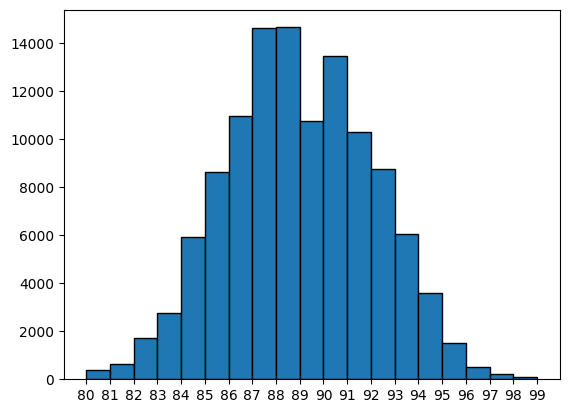

In [17]:
# Checking the points column in our dataset using a Histogram
# Set custom x-ticks and bins
custom_ticks = np.arange(80, 100, 1)
point_bins = np.arange(80, 100, 1)
plt.hist(df['points'], bins=point_bins, edgecolor='black')
plt.xticks(custom_ticks)
plt.show()

In [18]:
# Creating a DataFrame to fill in empyt price values by getting the average price of wines from same Country, Variety and Wineryr.
# If all 3 are not available, then joined using Country and Variety only.
price_agg = df.groupby(by=['country', 'variety', 'winery'])['price'].mean().reset_index()
price_agg1 = df.groupby(by=['country', 'variety'])['price'].mean().reset_index()
price_df = pd.merge(price_agg, price_agg1, on=['country', 'variety'], how='left')

In [19]:
# Filling the null values
price_df['price_x'] = price_df['price_x'].combine_first(price_df['price_y'])
price_df = price_df.drop(columns='price_y')
price_df = price_df.rename(columns={'price_x':'fill_price'})

In [20]:
# Adding the new column to main DataFrame and replacing missing pricing values
df = pd.merge(df, price_df, on=['country', 'variety', 'winery'], how='left')
df['price'] = df['price'].combine_first(df['fill_price'])

In [21]:
# Dopping the 'fill_price' column
df = df.drop(columns='fill_price')
df.head()

,country,description,points,price,province,region_1,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,19.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012


In [22]:
# Removing 26 rows with no price info
df = df.dropna(subset=['price'])
df.isna().sum()

country            0
description        0
points             0
price              0
province           0
region_1       18970
title              0
variety            0
winery             0
year               0
dtype: int64

In [28]:
df.shape

(115569, 10)

In [23]:
# Getting the numerical details of the 'points' column
df['price'].describe()

count    115569.000000
mean         36.834725
std          47.614558
min           4.000000
25%          17.055556
50%          26.000000
75%          44.000000
max        3300.000000
Name: price, dtype: float64

In [24]:
# Checking what percentage of the wines are above 100$ which we will not show in our histogra depending on the outcome for simplicity and treat them like outliers
expensive_wines = (df['price']>100).sum()
round(expensive_wines/len(df),4)*100

3.2

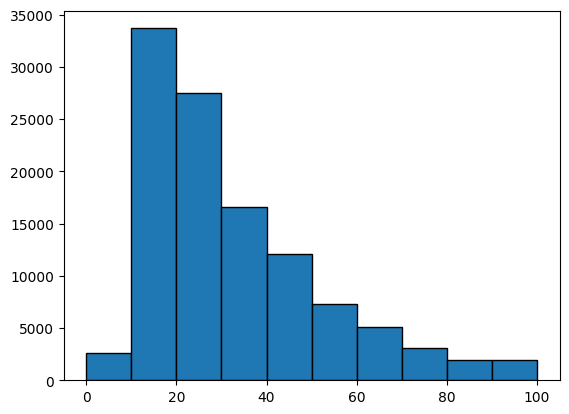

In [25]:
# Checking the price column in our dataset using a Histogram
# Setting bins in between 0-100. Excluding values larger than 100 since they only make 3.2% of the dataset.
bin_edges = range(0, 101, 10)
plt.hist(df['price'], bins=bin_edges, edgecolor='black')
plt.show()

In [27]:
df.shape

(115569, 10)

In [30]:
df[df['title'].duplicated(keep=False)].sort_values(by='title')

,country,description,points,price,province,region_1,title,variety,winery,year
22567,Italy,This initially opens with funky aromas of barn...,88,41.166667,Piedmont,Barbaresco,Ada Nada 2012 Rombone Elisa (Barbaresco),Nebbiolo,Ada Nada,2012
59283,Italy,"Fig, stewed prune, sun baked soil, camphor and...",92,47.000000,Piedmont,Barbaresco,Ada Nada 2012 Rombone Elisa (Barbaresco),Nebbiolo,Ada Nada,2012
87596,Portugal,"Soft and rich wine, its perfumes and sweet tan...",87,14.000000,Alentejano,NaN,Adega Cooperativa de Borba 2009 Senses Syrah (...,Syrah,Adega Cooperativa de Borba,2009
37213,Portugal,"For a Syrah, this is soft, offering more of th...",87,13.000000,Alentejano,NaN,Adega Cooperativa de Borba 2009 Senses Syrah (...,Syrah,Adega Cooperativa de Borba,2009
24483,Portugal,This big and bold wine exudes power and fruiti...,91,14.000000,Tejo,NaN,Adega Cooperativa do Cartaxo 2011 Bridão Reser...,Portuguese Red,Adega Cooperativa do Cartaxo,2011
...,...,...,...,...,...,...,...,...,...,...
11234,Italy,"This blend of Chardonnay, Sauvignon and Pinot ...",90,24.000000,Northeastern Italy,Collio,Zuani 2011 Vigne White (Collio),White Blend,Zuani,2011
13367,France,Lovely notes of Golden Pearmain apple perfume ...,93,58.000000,Alsace,Crémant d'Alsace,Zusslin 2012 Clos Liebenberg Sparkling (Créman...,Sparkling Blend,Zusslin,2012
76490,France,"Exquisitely fragrant notes of ripe, aromatic a...",93,57.000000,Alsace,Crémant d'Alsace,Zusslin 2012 Clos Liebenberg Sparkling (Créman...,Sparkling Blend,Zusslin,2012
29987,US,You can smell the extreme alcohol level on thi...,82,37.000000,California,Santa Barbara County,a-non-ah-mus 2010 Alisos Vineyard Syrah (Santa...,Syrah,a-non-ah-mus,2010


In [31]:
# Removing every row that has duplicate descriptions
dupe_title = df['title'].duplicated(keep=False)
df = df[~dupe_title]
df.shape

(114621, 10)

In [33]:
# Will most likely not need it but 43% of our province data is made out of 'Other'
other_province = (df['province']=='Other').sum()
round(other_province/len(df)*100,4)

0.4371

In [34]:
df.head()

,country,description,points,price,province,region_1,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,19.0,Sicily & Sardinia,Etna,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
